# Hochschule Bonn-Rhein-Sieg

# Mathematics for Robotics and Control

# 01 - Introduction to Python for Mathematics

In [1]:
###### Run this cell (Ctrl + enter) when you first open 
###### the notebook to import all packages
import numpy as np
import numpy.linalg as linalg
import scipy as scp
import sympy as sp
import matplotlib.pyplot as plt
import imageio
from skimage import transform
%matplotlib inline

To find the documentation for a function, use a ? after the function as below and run the cell

In [2]:
np.array?

## Creating a rotation matrix

Let's suppose that we have a robot that is located at the origin of the world frame, such that its local coordinate system is aligned with the world frame. The robot now rotates counterclockwise by $\frac{\pi}{4}$ radians around the $z$-axis. Our task is to define a rotation matrix that expresses the robot's rotation; in other words, denoting the world frame by $A$ and the robot frame by $B$, we need to express the matrix ${}^A_BR$.

In [3]:
def get_rotation_matrix_z_axis(theta: float) -> np.array:
    # this is how you create a 2D array/matrix
    A_B_R = np.array([[np.cos(theta), -np.sin(theta), 0.], 
                      [np.sin(theta), np.cos(theta),  0.], 
                      [0.,            0.,             1.]])
    return A_B_R

def get_rotation_matrix_x_axis(theta: float) -> np.array:
    A_B_R = np.array([[1., 0.,             0.], 
                      [0., np.cos(theta), -np.sin(theta)], 
                      [0., np.sin(theta), np.cos(theta)]])
    return A_B_R

def get_rotation_matrix_y_axis(theta: float) -> np.array:
    A_B_R = np.array([[np.cos(theta),  0., np.sin(theta)], 
                      [0.,             1., 0.], 
                      [-np.sin(theta), 0., np.cos(theta)]])
    return A_B_R


theta = np.pi / 4.
print(get_rotation_matrix_z_axis(theta))

[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


## Plotting the frames

Let's now plot the world frame and the rotated frame of the robot together.

Text(0.5,1,'Frames')

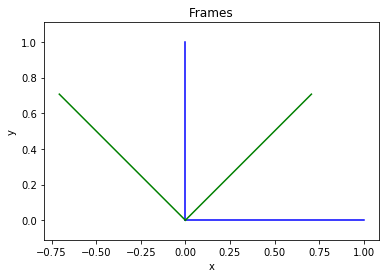

In [4]:
# world frame (plot line from (0,0) to (1,0))
plt.plot([0., 1.], [0., 0.], 'b')

# plot line from (0,0) to (0,1))
plt.plot([0., 0.], [0., 1.], 'b')

# robot frame
plt.plot([0., np.cos(theta)], [0., np.sin(theta)], 'g')
plt.plot([0., -np.sin(theta)], [0., np.cos(theta)], 'g')

# Always label axes and title the plot
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Frames')

## Translating frames

Let's now assume that, instead of rotating, the robot translates by $3$ units along the $x$-axis and $5$ units along the $y$-axis. We could express this in Python as follows:

In [5]:
# start point
p_b = np.array([0., 0., 0.])

# translation vector
t = np.array([3., 5., 0.])

# new point
p_b_new = p_b + t
print(p_b_new)

[3. 5. 0.]


## Plotting the frames

Let's now plot the world frame and the translated frame of the robot.

Text(0.5,1,'Frames')

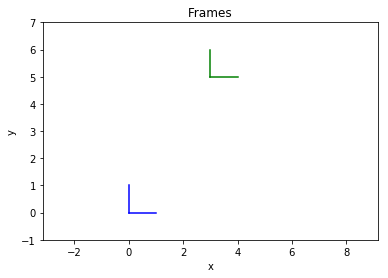

In [6]:
# world frame
plt.plot([0., 1.], [0., 0.], 'b')
plt.plot([0., 0.], [0., 1.], 'b')

# robot frame
plt.plot([p_b_new[0], p_b_new[0] + 1], [p_b_new[1], p_b_new[1]], 'g')
plt.plot([p_b_new[0], p_b_new[0]], [p_b_new[1], p_b_new[1] + 1], 'g')

plt.axis('equal')

plt.xlim([-1, 7])
plt.ylim([-1, 7])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Frames')

## Combining rotation and translation into a homogeneous transformation matrix

Let's now assume that the robot both rotates by $\frac{\pi}{4}$ around the $z$-axis and translates by $3$ units along the $x$-axis and $5$ units along the $y$-axis. As we know from the lecture, rotations and translations can be expressed together in a so-called homogeneous transformation matrix. Let's perform this transformation in Python.

In [7]:
# start point in homogeneous coordinates
p_b = np.array([0., 0., 0., 1.])

# translation vector
t = np.array([3., 5., 0.])

# converting p_b into a column vector
p_b = p_b[np.newaxis].T
t = t[np.newaxis].T

# get rotation matrix
A_B_R = get_rotation_matrix_z_axis(np.pi / 4.)

# creating the transformation matrix
# stack rotation matrix and translation vector horizontally
T = np.hstack((A_B_R, t))

# stack vertically
T = np.vstack((T, np.array([0., 0., 0., 1])))

print('homogeneous transformation matrix')
print(T)

# transforming p_b: multiply the homogeneous transformation matrix with the start point
p_b_new = T.dot(p_b)

# selecting and printing the translation column (all rows and column 4)
# (NOTE: columns and rows are zero-indexed)
print('translation')
print(T[:,3])
print()

# selecting and printing the last row of the matrix (row 4 and all columns)
print('last row')
print(T[3,:])
print()

# selecting and printing the rotation matrix (first three rows and columns)
print('rotation')
print(T[0:3, 0:3])

homogeneous transformation matrix
[[ 0.70710678 -0.70710678  0.          3.        ]
 [ 0.70710678  0.70710678  0.          5.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]
translation
[3. 5. 0. 1.]

last row
[0. 0. 0. 1.]

rotation
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


## Plotting the frames

Let's plot the world frame and the transformed robot frame.

Text(0.5,1,'Frames')

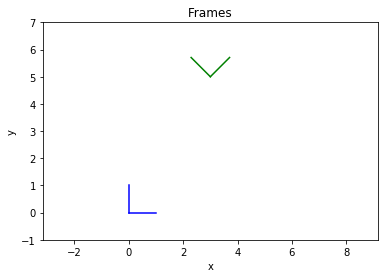

In [8]:
# world frame
plt.plot([0., 1.], [0., 0.], 'b')
plt.plot([0., 0.], [0., 1.], 'b')

# robot frame
plt.plot([p_b_new[0], p_b_new[0] + T[0,0]], [p_b_new[1], p_b_new[1] + T[1,0]], 'g')
plt.plot([p_b_new[0], p_b_new[0] + T[0,1]], [p_b_new[1], p_b_new[1] + T[1,1]], 'g')

plt.axis('equal')

plt.xlim([-1, 7])
plt.ylim([-1, 7])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Frames')

## Symbolic mathematics using symbolic Python

In [9]:
# create a symbolic variable
x = sp.symbols('x')

# creating a function of x. y is now a symbolic function
y = x**2

# substituting values into y
n1 = y.evalf(subs={x: 2.})
print('n1 =', n1)
n2 = y.evalf(subs={x: 4.})
print('n2 =', n2)

# differentiating y with respect to x
y_prime = y.diff(x)
print('y_prime =', y_prime)

# integrating y with respect to x
y_integral = y.integrate(x)
print('y_integral =', y_integral)

# substituting values into y_prime
n3 = y_prime.evalf(subs={x: 2.})
print('n3 =', n3)
n4 = y_prime.evalf(subs={x: 4.})
print('n4 =', n4)

n1 = 4.00000000000000
n2 = 16.0000000000000
y_prime = 2*x
y_integral = x**3/3
n3 = 4.00000000000000
n4 = 8.00000000000000


## Loading files and plotting 3D data

shape:
(625, 3)
first row
[ 1.22464680e-16  1.49975978e-32 -1.00000000e+00]


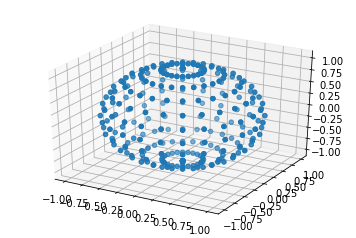

In [10]:
from mpl_toolkits.mplot3d import Axes3D

# first column is x coordinates, second column y, and third column z
data = np.loadtxt('files/point_cloud.txt')

# print size and shape of array (rows, columns)
print("shape:")
print(data.shape)

# print first row of array
print("first row")
print(data[0, :])

figure = plt.figure(1)
ax = figure.add_subplot(111, projection='3d')

# scatter plot with x, y and z positions of the points
ax.scatter(data[:,0], data[:,1], data[:,2])
plt.show()

## Loading and manipulating images

(892, 800, 3)
Original image shape = (892, 800, 3)
Resized image shape = (300, 300, 3)


/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


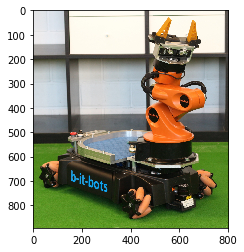

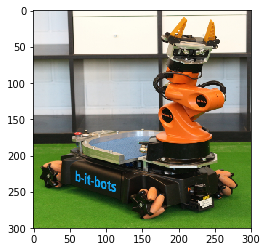

In [11]:
# load an image into a numpy array
image = imageio.imread('files/youbot.jpg')

# the shape of the image is 892 (height) x 800 (width) x 3 (number of channels: RGB)
print(image.shape)

# displaying the image
print('Original image shape =', image.shape)
plt.figure(1)
plt.imshow(image)

# resizing image and displaying the resized version
resized_image = transform.resize(image, (300, 300))
print('Resized image shape =', resized_image.shape)
plt.figure(2)
plt.imshow(resized_image)

## Optimising functions using scipy

In [12]:
# create a function that returns the square of a number
def f(x: float) -> float:
    return x**2

# create a function that returns the differential of x**2
def f_prime(x: float) -> float:
    return 2*x

# optimising x**2 starting at x = 0.5 (the minimum occurs 
# at x = 0, so that's the expected solution)
from scipy.optimize import minimize
x0 = np.array([0.5])
result = minimize(f, x0, jac=f_prime)
print(result.x)

[6.77626358e-21]
